<div style="display: flex; background-color: RGB(26,39,55);" >
<h1 style="margin: auto; padding: 30px; color:white;">Etude de Marché : Analyse en Composantes Principales, Classification Hierarchique et K-Means.</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Chargement des données</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_final=pd.read_csv("Etude_marche.csv",index_col="Pays")

In [3]:
df_final.head(5)

,Nbe_habitants,Evolution_habitants,Importations_2022,Consommation_2022,Importations_quantité_Croissance,Nourriture_Croissance,Production_Croissance,Radio_conso,PIB,PIB_3ans,prix_poulet,PIB_habitant
Pays,,,,,,,,,,,,
Allemagne,84548.231,0.294607,789.0,1376.0,-5.054152,-4.775087,-2.396373,0.599303,4.682715e+06,6.512098,123.52,55.385138
Japon,124370.947,-0.462650,1163.0,3458.0,2.107112,38.708383,3.220191,0.978218,4.027838e+06,7.508712,123.19,32.385682
Inde,1438069.596,0.871167,0.0,4946.0,0.000000,12.870835,12.856166,0.998990,3.902301e+06,2.450094,145.41,2.713569
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,68682.962,0.580524,947.0,2397.0,13.822115,4.901532,1.035197,0.826837,3.556264e+06,4.815189,109.79,51.777972
France,66438.822,0.268719,667.0,1590.0,23.290203,-5.131265,-10.963855,0.741259,3.165065e+06,7.526570,138.49,47.638786


In [4]:
col=df_final.columns.tolist()

In [5]:
df_final.head(3)

,Nbe_habitants,Evolution_habitants,Importations_2022,Consommation_2022,Importations_quantité_Croissance,Nourriture_Croissance,Production_Croissance,Radio_conso,PIB,PIB_3ans,prix_poulet,PIB_habitant
Pays,,,,,,,,,,,,
Allemagne,84548.231,0.294607,789.0,1376.0,-5.054152,-4.775087,-2.396373,0.599303,4.682715e+06,6.512098,123.52,55.385138
Japon,124370.947,-0.462650,1163.0,3458.0,2.107112,38.708383,3.220191,0.978218,4.027838e+06,7.508712,123.19,32.385682
Inde,1438069.596,0.871167,0.0,4946.0,0.000000,12.870835,12.856166,0.998990,3.902301e+06,2.450094,145.41,2.713569


In [6]:
df_final.shape

(108, 12)

In [7]:
X=df_final.values

In [8]:
pays = df_final.index

In [9]:
features = df_final.columns

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Mise en place ACP</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1 - Importation des bibliothèques</h3>
</div>

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2 - Mise à l'echelle</h3>
</div>

In [11]:
scaler = StandardScaler()

In [12]:
X_scaled = scaler.fit_transform(X)

In [13]:
#Vérification moyenne et écart type
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11
mean,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [14]:
#Sauvegarde du dataFrame X_scaled
dfX_scaled=pd.DataFrame(X_scaled, columns=[features], index=pays)
dfX_scaled.to_csv('dfX_scaled.csv', index =False)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.3 - entrainement ACP</h3>
</div>

In [15]:
num_components = 12
pca = PCA(n_components = num_components)
pca.fit(X_scaled)

PCA(n_components=12)

In [16]:
#Vérification de la variance captée
scree=(pca.explained_variance_ratio_*100).round(2)
scree

array([24.18, 14.56, 13.54, 10.  ,  7.94,  7.33,  6.93,  5.14,  4.39,
        3.08,  1.76,  1.16])

In [17]:
#Préparation somme cumulé pour représentation de l'éboulie
scree_cum = scree.cumsum().round(2)
scree_cum

array([ 24.18,  38.74,  52.28,  62.28,  70.22,  77.55,  84.48,  89.62,
        94.01,  97.09,  98.85, 100.01])

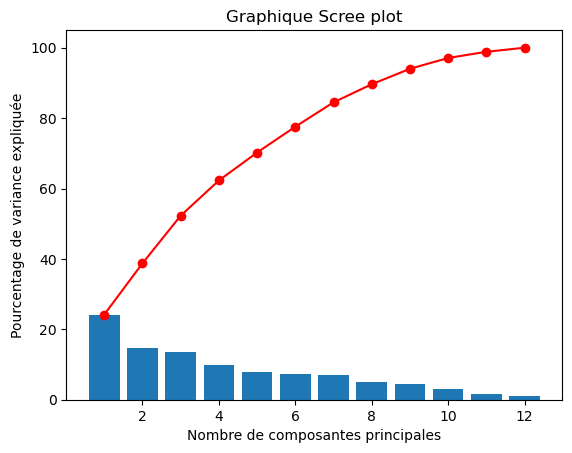

In [18]:
Affich_scree_plot(pca)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.4 - Les composantes</h3>
</div>

In [19]:
pcs = pca.components_

In [20]:
pcs = pd.DataFrame(pcs, columns=df_final.columns, index=[f"F{i}" for i in np.arange(len(scree))+1])
pcs.T.round(2).iloc[:,:4]

,F1,F2,F3,F4
Nbe_habitants,0.20,0.27,0.51,-0.21
Evolution_habitants,-0.36,0.12,0.09,-0.20
Importations_2022,0.39,0.13,-0.19,0.07
Consommation_2022,0.36,0.24,0.40,0.01
Importations_quantité_Croissance,-0.07,0.13,0.09,0.63
Nourriture_Croissance,-0.12,0.61,-0.34,0.00
Production_Croissance,-0.18,0.61,-0.19,-0.08
Radio_conso,-0.25,0.14,0.39,-0.10
PIB,0.51,0.20,0.13,0.02
PIB_3ans,-0.12,0.11,0.06,0.55


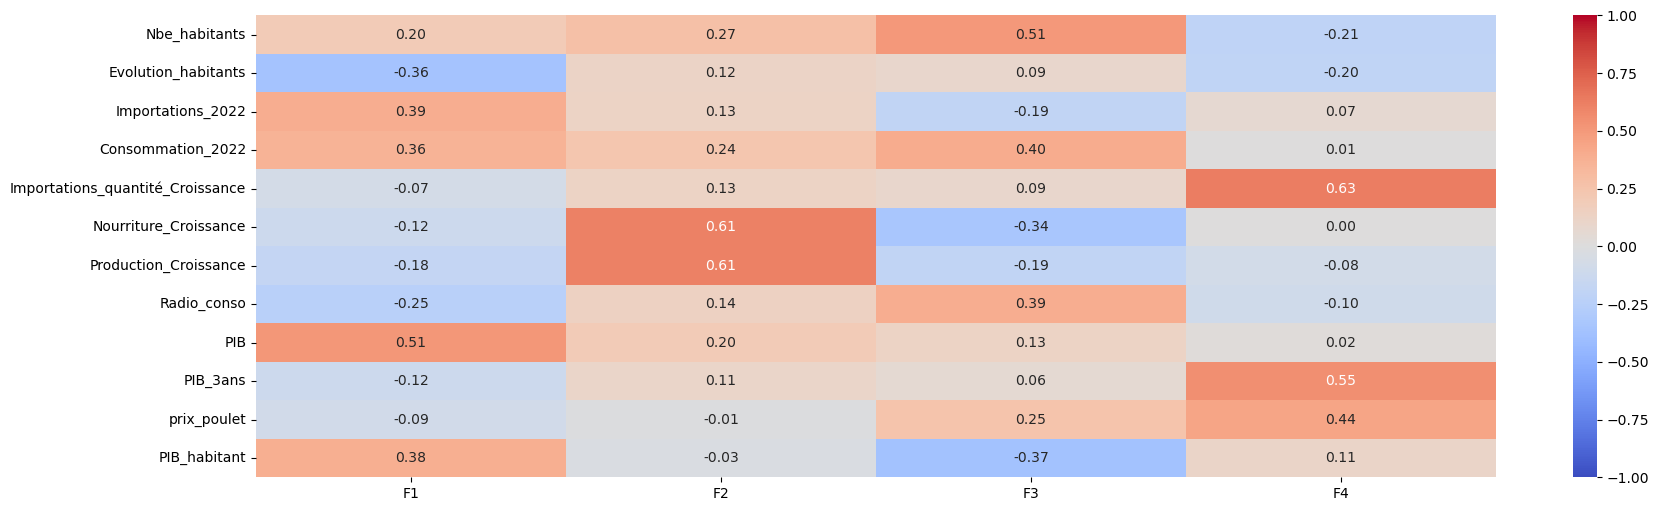

In [21]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T.iloc[:,:4], vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show(block=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.5 - Cercle des corrélations</h3>
</div>

In [22]:
#Définition des axes
x, y = 0,1

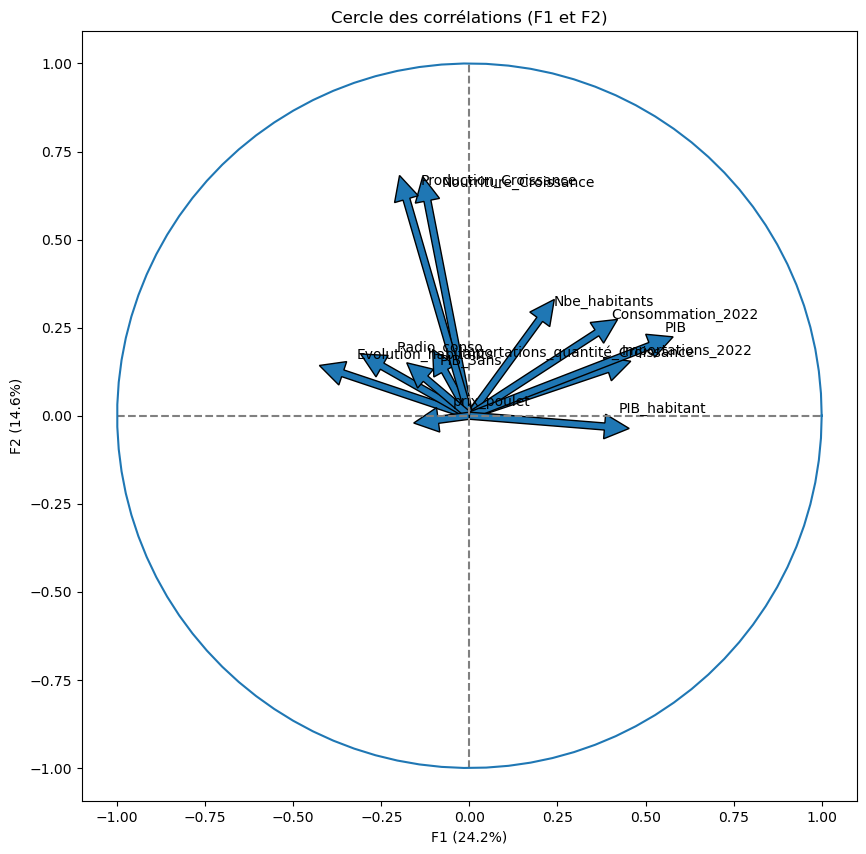

In [23]:
correlation_graph(pca, (0,1), features)

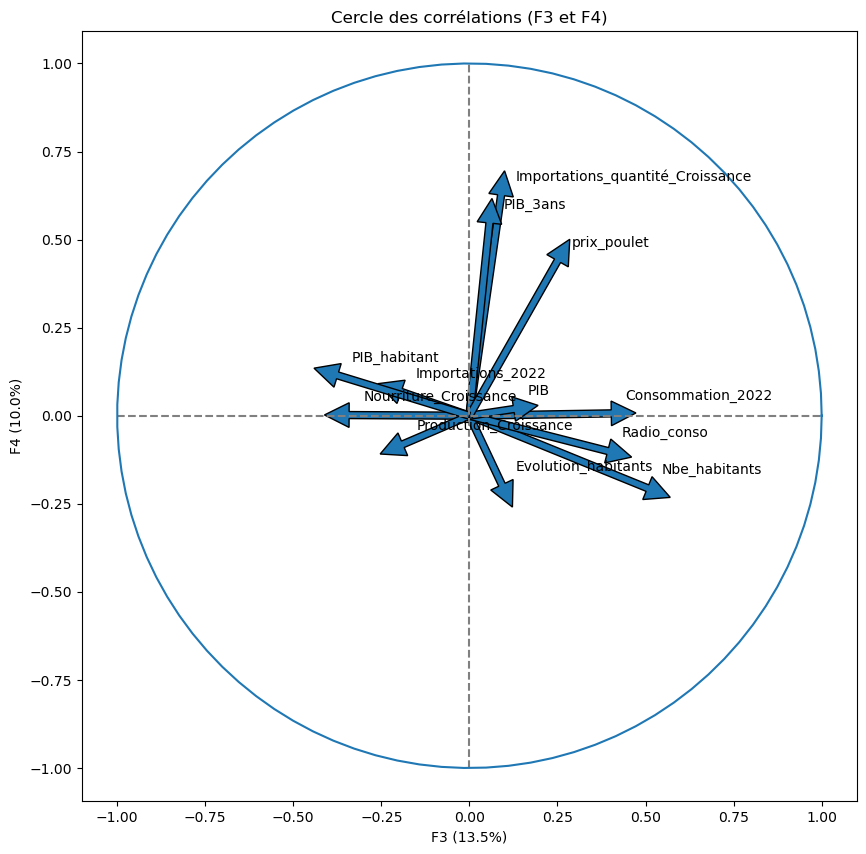

In [24]:
correlation_graph(pca, (2,3), features)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.6 - projection des individus</h3>
</div>

In [25]:
# Transform the original scaled data to the new vector space
X_projected = pca.transform(X_scaled)

In [26]:
#Création d'un modele sur 2 dimensions pour visualisation
pca = PCA(n_components=4)
pca.fit(X_scaled)

PCA(n_components=4)

In [27]:
#Transformation des données scalés dans nouvelle ACP 
X_reduced = pca.transform(X_scaled)

In [28]:
X_reduceddf=pd.DataFrame(X_reduced, index=pays, columns=['PC1','PC2','PC3','PC4'])

In [29]:
X_reduceddf

,PC1,PC2,PC3,PC4
Pays,,,,
Allemagne,5.276041,0.415892,-1.038990,0.409773
Japon,5.251266,1.959655,0.053330,0.271500
Inde,4.498360,3.969369,6.983803,-2.362632
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,4.671617,0.832524,-0.652422,0.243336
France,3.949221,-0.005319,-0.608107,0.443213
...,...,...,...,...
Soudan du Sud,-1.225613,-1.846145,0.996120,0.995724
Malawi,-1.844844,0.727706,0.253268,0.095847
Togo,-0.997367,-1.739505,0.662180,-0.650512


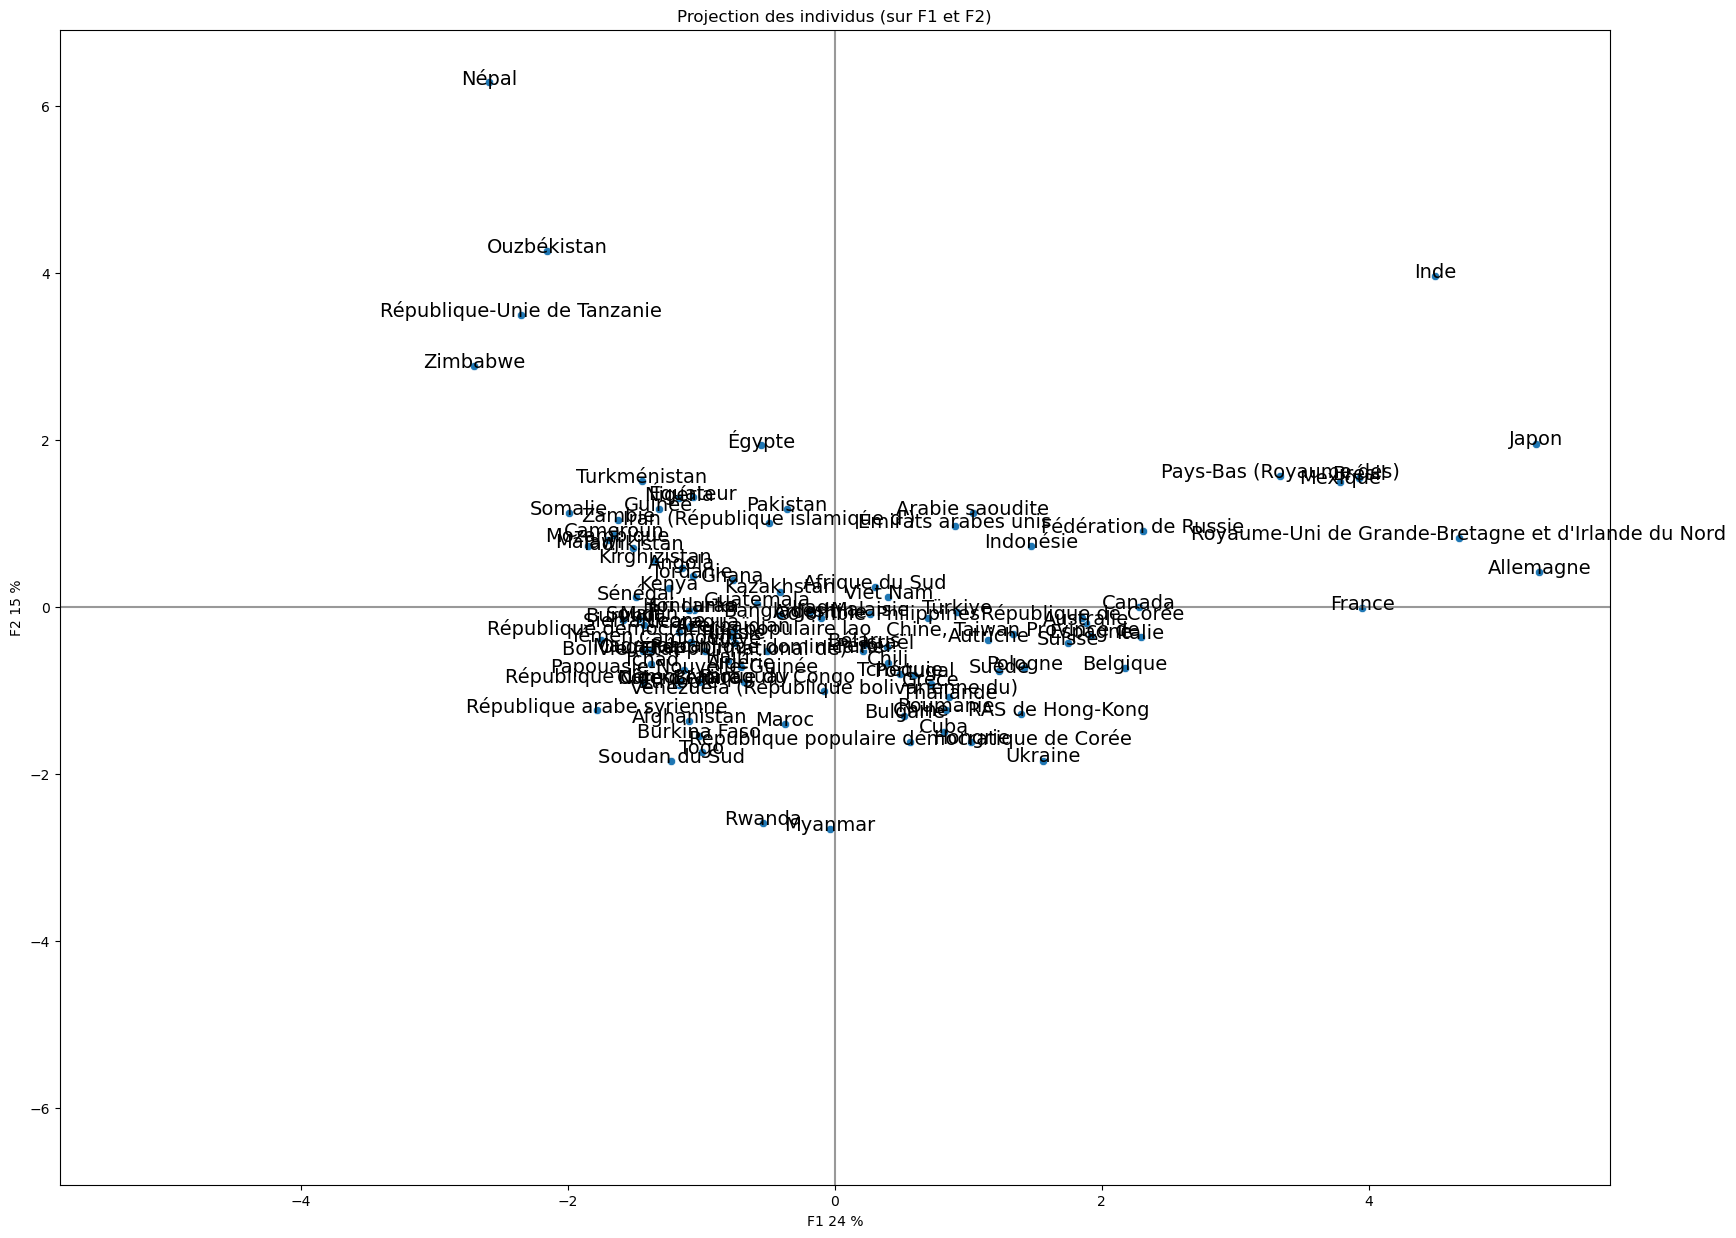

In [30]:
x_y = [0,1]
display_factorial_planes(X_reduceddf , x_y, pca,labels=pays, figsize=(20,15), marker="x")

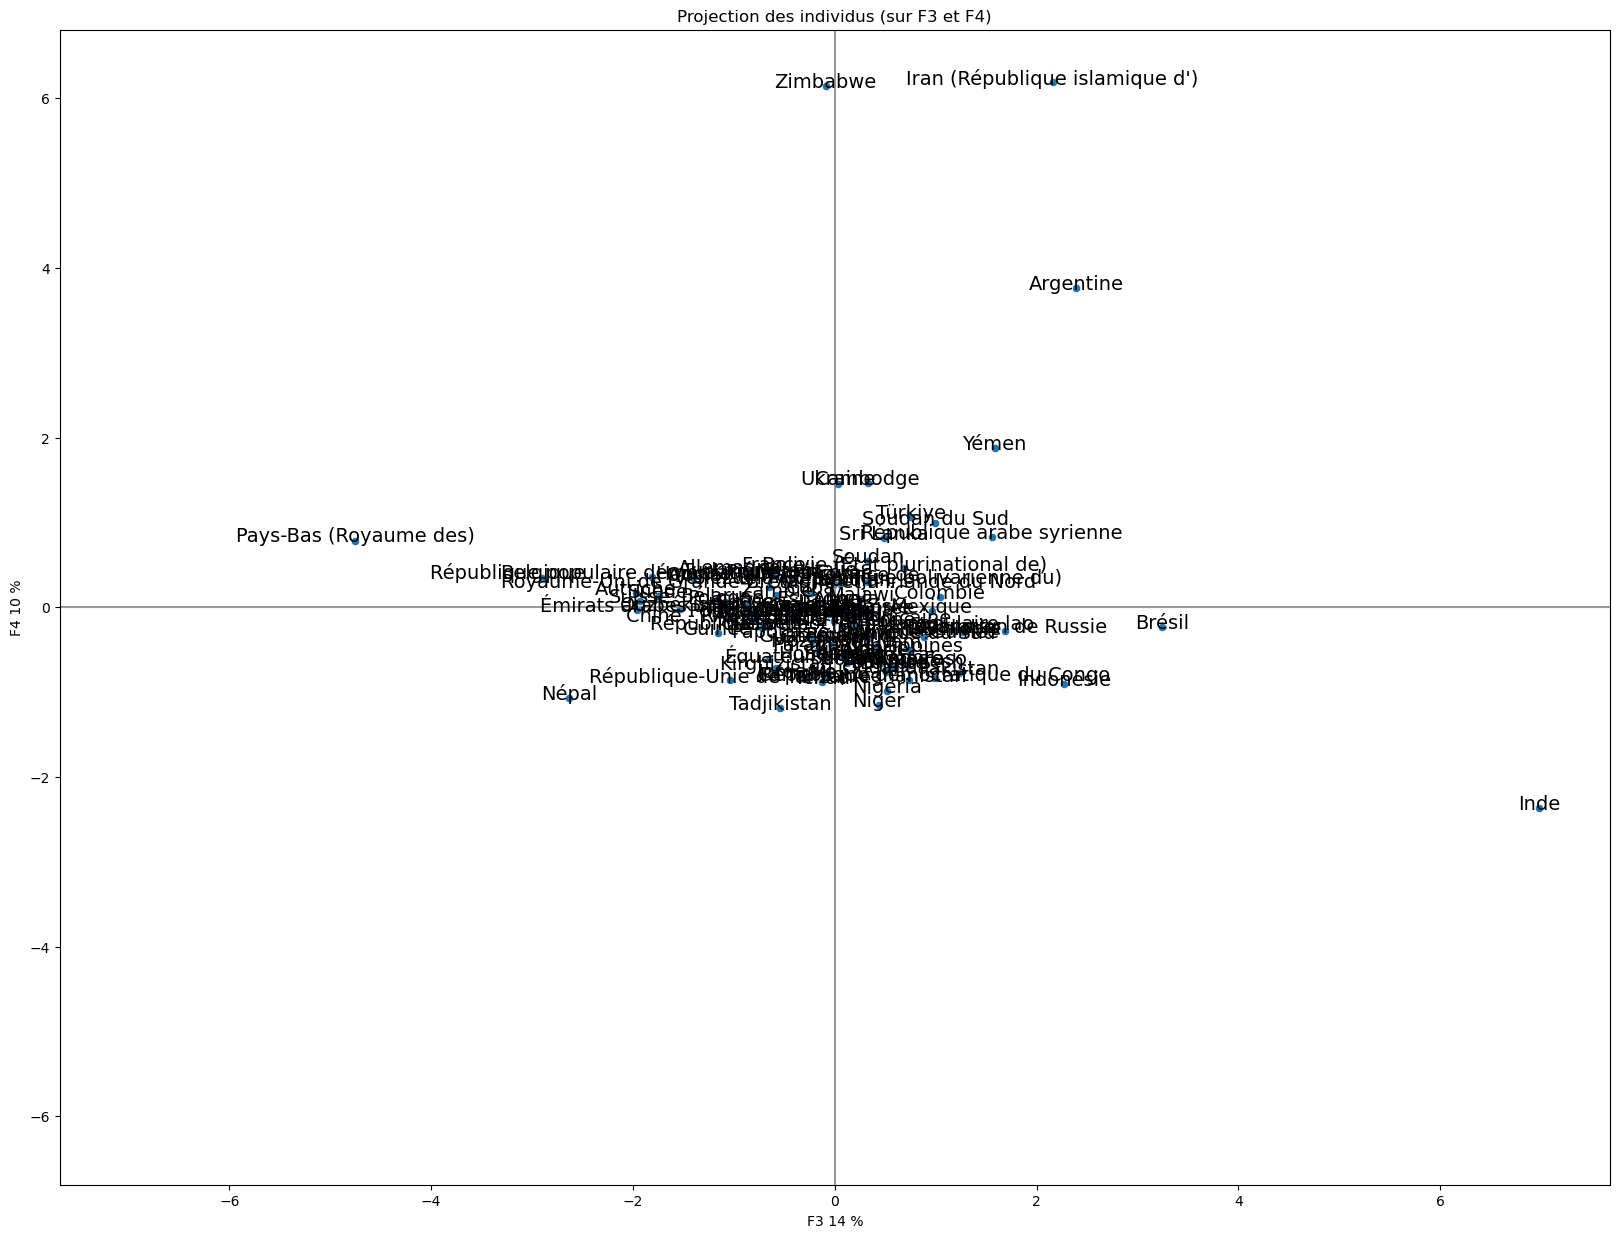

In [31]:
x_y = [2,3]
display_factorial_planes(X_reduceddf , x_y, pca,labels=pays, figsize=(20,15), marker="x")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Classification Hierarchique Ascendante</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Import des bibliothèques</h3>
</div>

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering


In [33]:
hiercluster = AgglomerativeClustering(linkage='ward', compute_full_tree=True)

In [34]:
hiercluster.set_params(n_clusters=6)
clusters = hiercluster.fit_predict(X_scaled)
np.bincount(clusters)

array([ 2, 64, 29,  4,  3,  6], dtype=int64)

In [35]:
X_scaled_clustered = pd.DataFrame(X_scaled, columns=features, index=pays)
X_scaled_clustered['Cluster']= clusters
X_scaled_clustered

,Nbe_habitants,Evolution_habitants,Importations_2022,Consommation_2022,Importations_quantité_Croissance,Nourriture_Croissance,Production_Croissance,Radio_conso,PIB,PIB_3ans,prix_poulet,PIB_habitant,Cluster
Pays,,,,,,,,,,,,,
Allemagne,0.194307,-0.833008,2.831483,0.399698,-0.234972,-0.539019,-0.389111,-1.564188,4.497449,-0.213573,-0.340712,2.036853,5
Japon,0.472466,-1.438196,4.439939,1.900484,-0.198306,0.588204,-0.222811,0.447142,3.786473,-0.183337,-0.343736,0.895958,5
Inde,9.648569,-0.372230,-0.561757,2.973092,-0.209094,-0.081584,0.062498,0.557405,3.650183,-0.336813,-0.140093,-0.575936,3
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,0.083489,-0.604508,3.510991,1.135675,-0.138323,-0.288172,-0.287506,-0.356408,3.274504,-0.265057,-0.466545,1.857918,5
France,0.067814,-0.853697,2.306800,0.553958,-0.089845,-0.548252,-0.642783,-0.810668,2.849794,-0.182795,-0.203514,1.652593,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Soudan du Sud,-0.316047,0.890157,-0.548855,-0.554692,0.046913,-1.475722,-1.509313,0.273231,-0.574158,2.035383,-0.005374,-0.661849,1
Malawi,-0.248844,1.030358,-0.561757,-0.486212,-0.209094,0.621686,0.922590,0.491515,-0.574531,-0.158041,1.630832,-0.684856,1
Togo,-0.331267,0.847600,-0.475743,-0.557575,-0.311497,-1.122226,-1.305115,0.562765,-0.575541,-0.188707,-0.408074,-0.657236,1


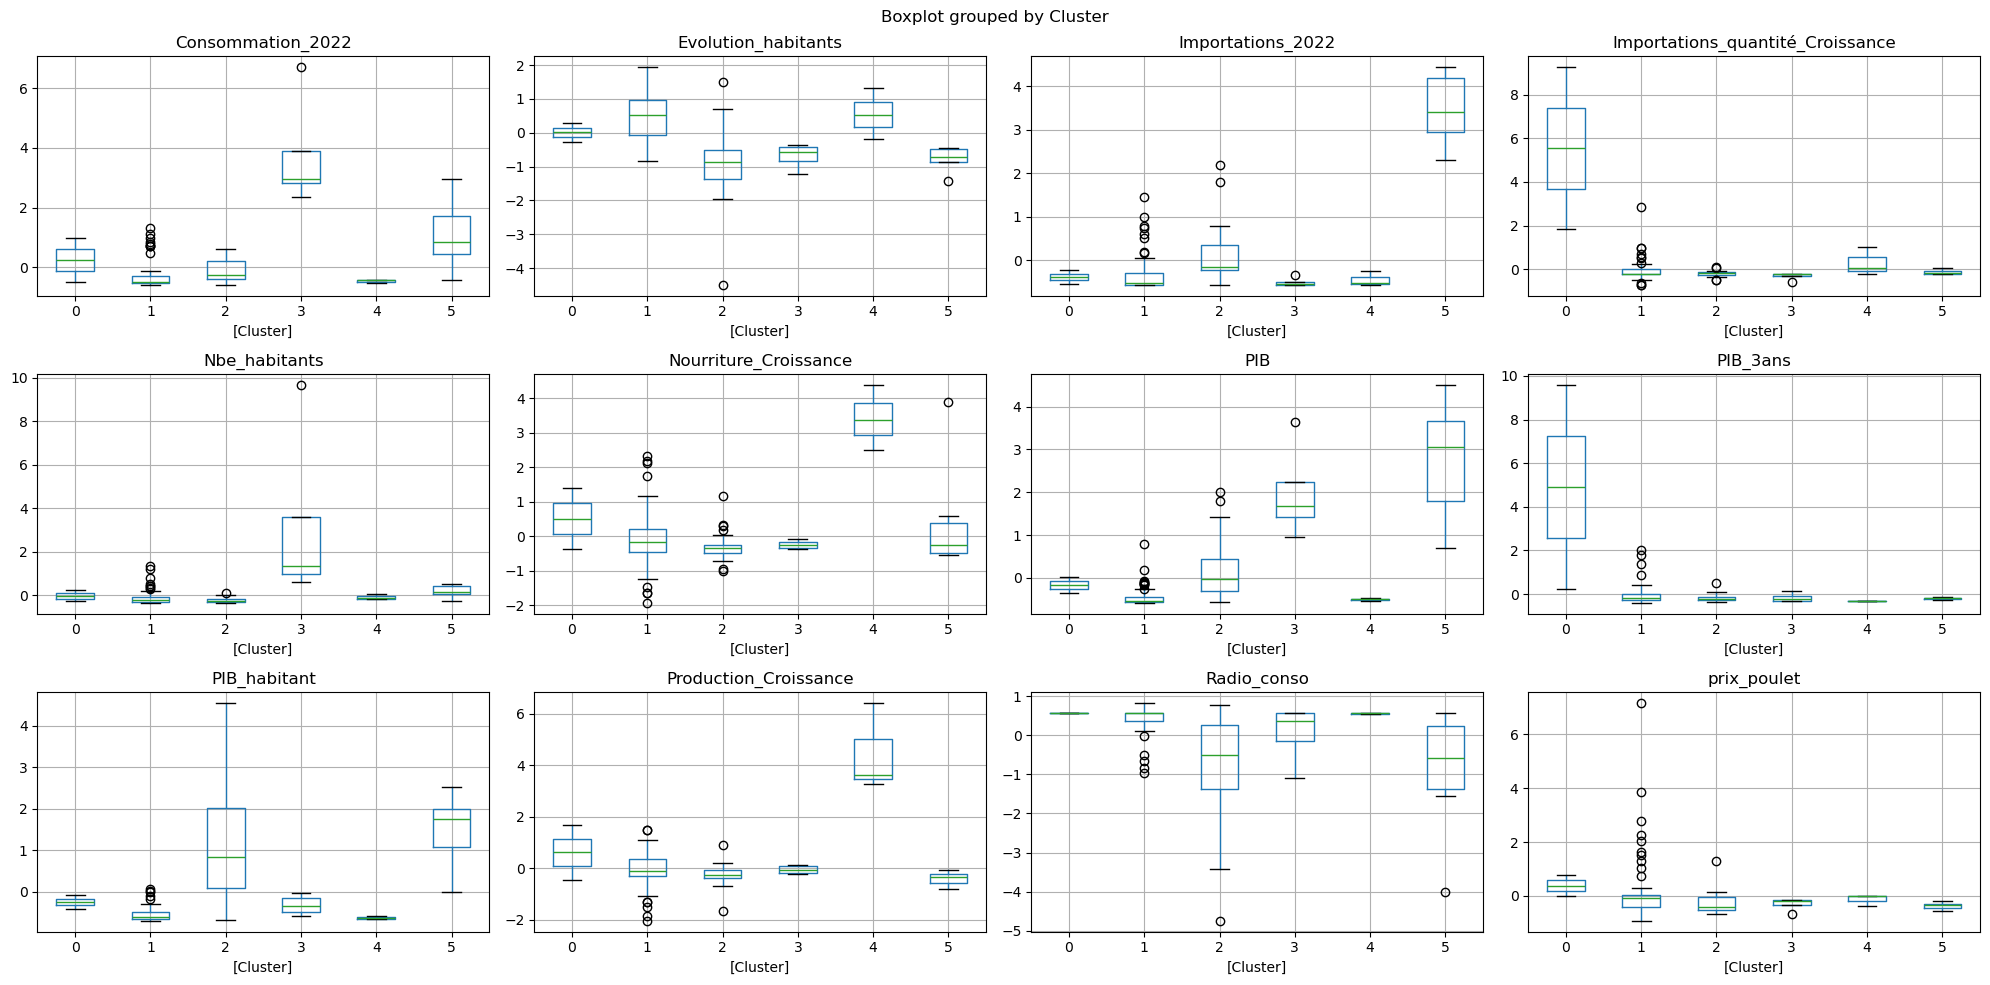

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
X_scaled_clustered.boxplot(by="Cluster", ax=axes.flatten())
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Mise en place Dendrogramme</h3>
</div>

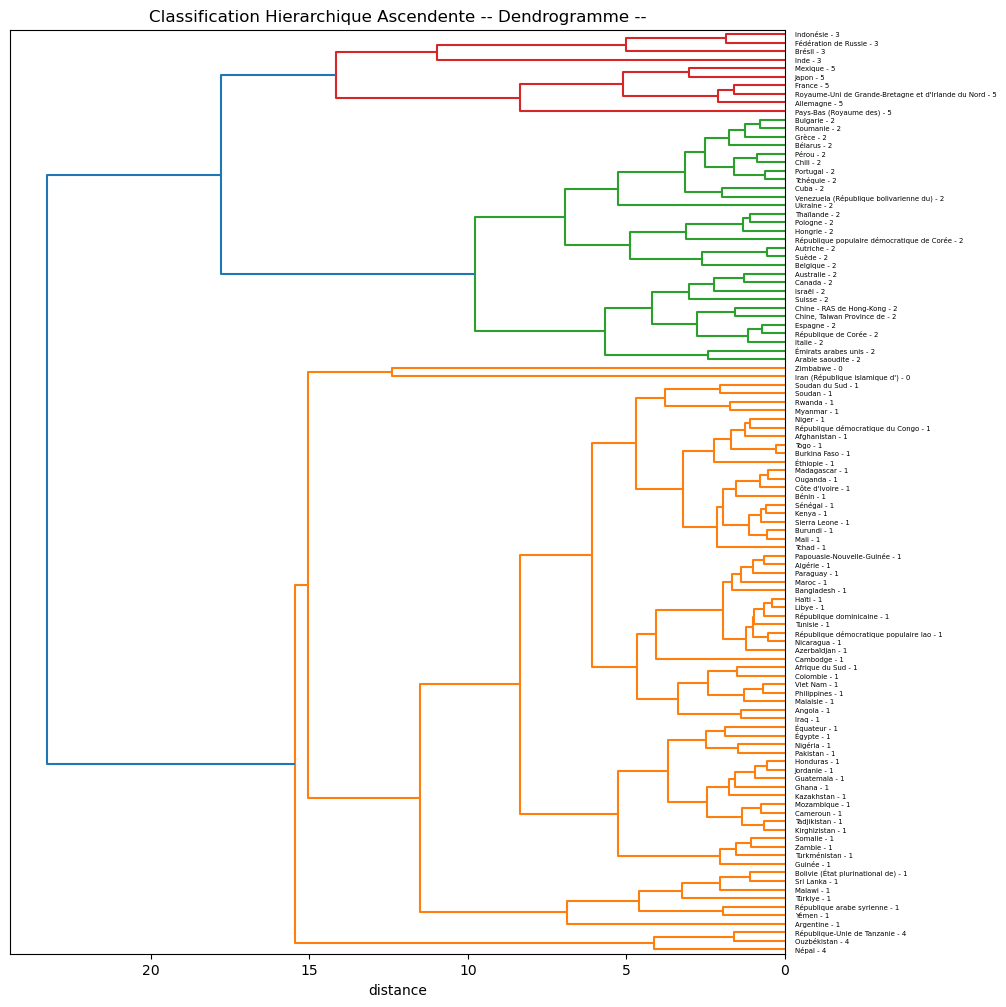

In [37]:
# Mise en place du Dendrogramme
Z = linkage(X_scaled_clustered, 'ward') 
names = [f"{idx} - {cluster}" for idx, cluster in zip(X_scaled_clustered.index, X_scaled_clustered["Cluster"])]
plot_dendrogram(Z, names, figsize=(10,12))

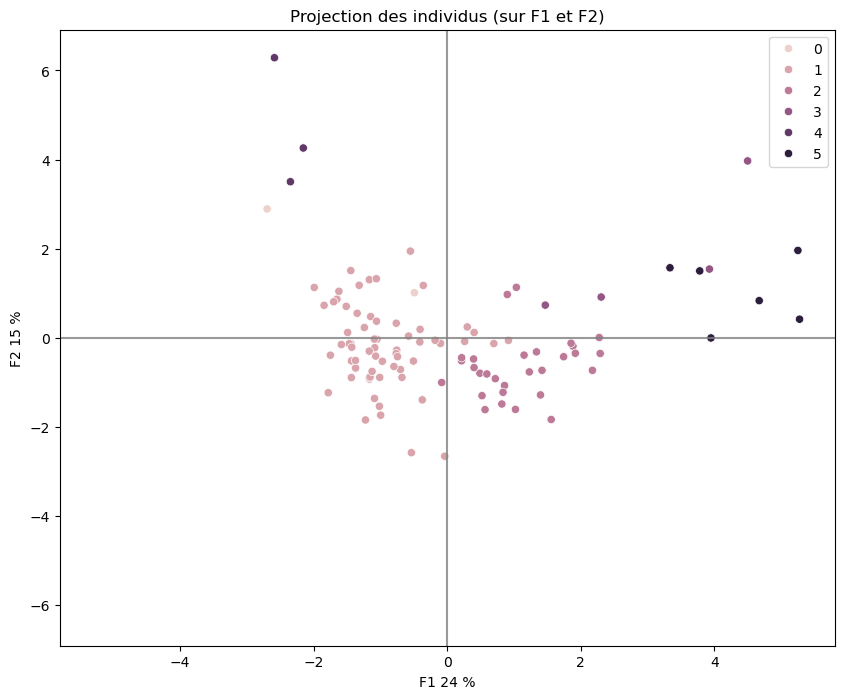

In [38]:
#Projection des clusters de la CHA sur les compostantes P1, P2
x_y = [0,1]
display_factorial_planes(X_reduceddf , x_y, pca, clusters=clusters, figsize=(10,8), alpha=3)

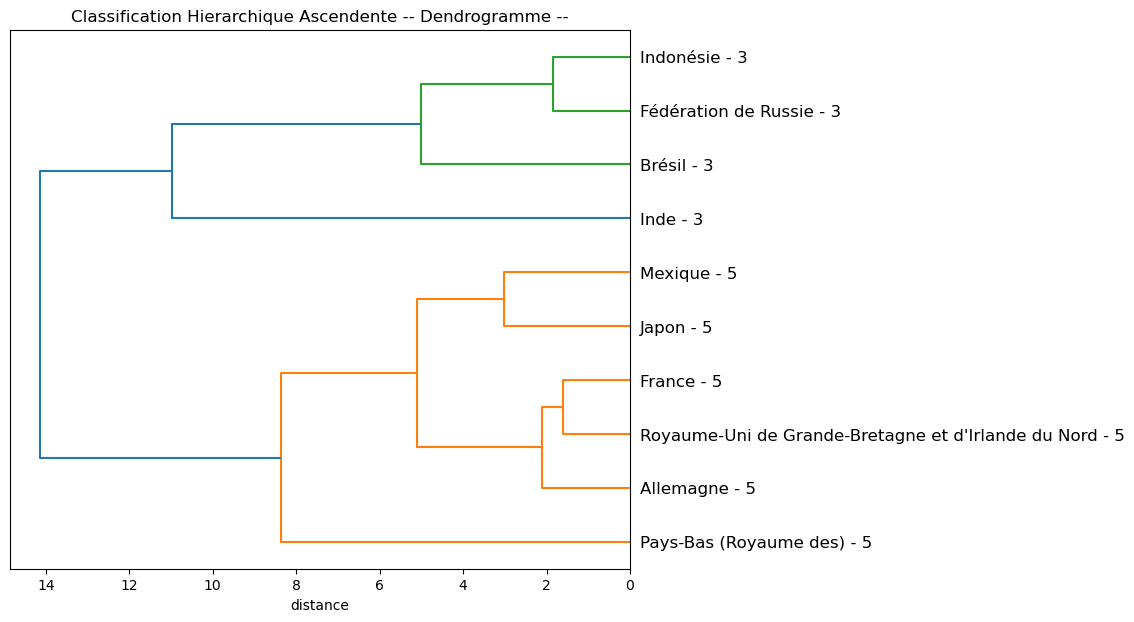

In [39]:
# Mise en place du Dendrogramme sur un cluster
sample = X_scaled_clustered[(X_scaled_clustered.Cluster == 5) | (X_scaled_clustered.Cluster == 3)]
Z = linkage(sample, 'ward') 
names = [f"{idx} - {cluster}" for idx, cluster in zip(sample.index, sample["Cluster"])]
plot_dendrogram(Z, names, figsize=(8,7))

In [40]:
# Display parallel coordinates plots, one for each cluster
means =  X_scaled_clustered.groupby(by="Cluster").mean().reset_index()

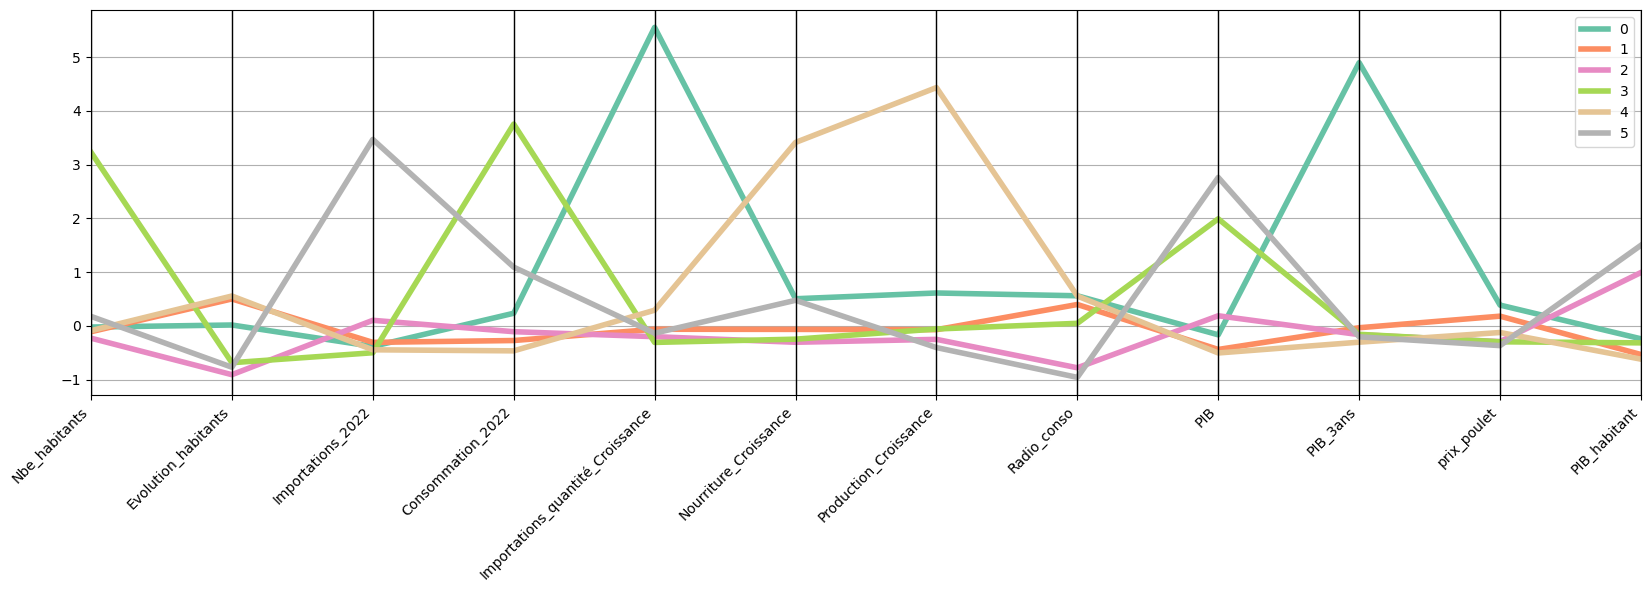

In [41]:
plt.figure(figsize=(20,5))
parallel_coordinates(means, 'Cluster', colormap=plt.cm.Set2, linewidth=4)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - K-Means</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - Import des bibliothèques</h3>
</div>

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 - Identification du nombre de cluster</h3>
</div>

  File "C:\Users\ramat\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ramat\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ramat\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ramat\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


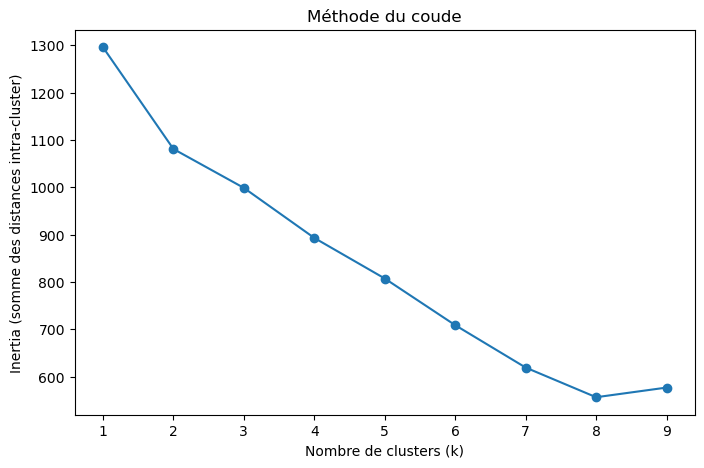

In [43]:
#Identification du nombre de clusters adaptés Elbow
inertias = []

K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=12)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Tracer la courbe
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertia (somme des distances intra-cluster)")
plt.title("Méthode du coude")
plt.show()

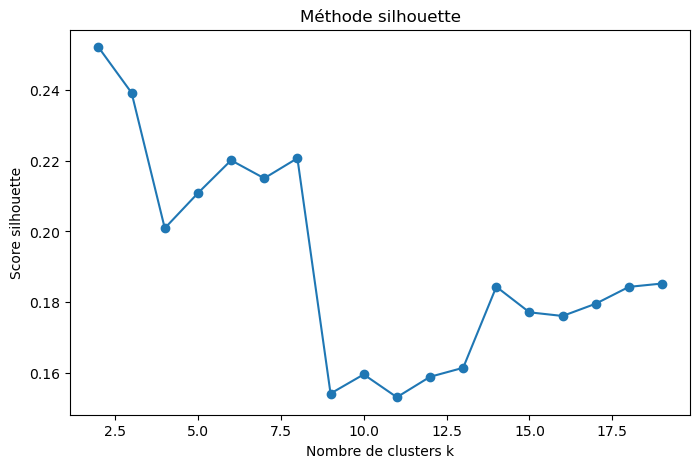

In [44]:
#Identification du nombre de clusters adaptés Silhouette
silhouettes = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouettes.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2, 20), silhouettes, marker='o')
plt.xlabel("Nombre de clusters k")
plt.ylabel("Score silhouette")
plt.title("Méthode silhouette")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3 - Réalisation d'un K-Means</h3>
</div>

In [45]:
#Choix du nombre de cluster :
n_cluster=8

In [46]:
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
kmeans.fit(X_scaled)

KMeans(random_state=42)

In [47]:
#Identification des Clusters
clusters = kmeans.labels_

In [48]:
#Récupération des Centroides
centers = kmeans.cluster_centers_

In [49]:
pd.DataFrame(centers, columns=features)

,Nbe_habitants,Evolution_habitants,Importations_2022,Consommation_2022,Importations_quantité_Croissance,Nourriture_Croissance,Production_Croissance,Radio_conso,PIB,PIB_3ans,prix_poulet,PIB_habitant
0,-0.220963,-0.942087,0.172431,-0.131096,-0.180236,-0.155555,-0.292889,-1.002827,0.247660,-0.195091,-0.226417,1.106693
1,-0.091811,0.754766,-0.453666,-0.359873,0.092505,1.647260,1.490853,0.385050,-0.507452,-0.177793,-0.091331,-0.596048
2,0.432318,-0.872451,2.375611,2.379224,-0.239830,-0.229138,-0.239990,-0.379473,2.745352,-0.142910,-0.287713,0.888754
3,9.648569,-0.372230,-0.561757,2.973092,-0.209094,-0.081584,0.062498,0.557405,3.650183,-0.336813,-0.140093,-0.575936
4,-0.143580,0.794350,-0.362492,0.035915,0.045588,-0.579976,-0.433187,0.427175,-0.314224,0.583927,4.602016,-0.430748
5,-0.089124,0.367734,-0.235319,-0.214137,-0.109461,-0.344918,-0.239742,0.423126,-0.402190,-0.039897,-0.090647,-0.498407
6,0.236639,-0.264277,-0.226304,0.976369,9.263177,-0.380220,-0.448823,0.555457,0.027686,0.218275,0.776667,-0.400880
7,-0.282118,0.295407,-0.540254,-0.507837,1.838964,1.388106,1.670489,0.562765,-0.361508,9.571217,-0.005374,-0.081724


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.4 - Visualisation Radar chart par Cluster</h3>
</div>

In [50]:
df_scaled = pd.DataFrame(X_scaled, index=pays, columns=features)

In [51]:
df_scaled["Cluster"] = clusters

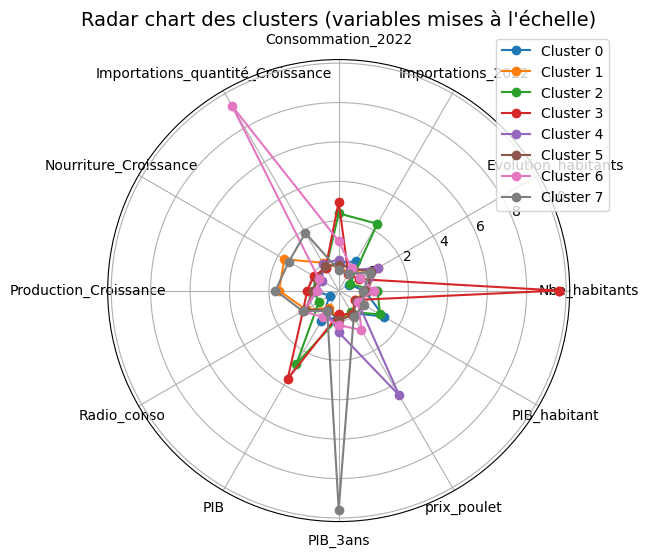

In [52]:
# Moyenne par cluster (sur données mises à l'échelle)
cluster_means_scaled = df_scaled.groupby("Cluster").mean()

# Variables
variables = cluster_means_scaled.columns.drop("Cluster") if "Cluster" in cluster_means_scaled.columns else cluster_means_scaled.columns
N = len(variables)

# Angles du radar
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Radar chart
plt.figure(figsize=(8, 6))

for i, row in cluster_means_scaled.iterrows():
    values = row[variables].tolist()
    values += values[:1]
    plt.polar(angles, values, marker='o', label=f"Cluster {i}")

# Étiquettes
plt.xticks(angles[:-1], variables, fontsize=10)
plt.title("Radar chart des clusters (variables mises à l'échelle)", size=14)
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1.06))
plt.show()

In [53]:
df_final["Cluster"]=clusters

In [54]:
#Construction des clusters par médiane
df_Clusters = df_final.groupby(["Cluster"]).median().round(0)
df_Clusters

,Nbe_habitants,Evolution_habitants,Importations_2022,Consommation_2022,Importations_quantité_Croissance,Nourriture_Croissance,Production_Croissance,Radio_conso,PIB,PIB_3ans,prix_poulet,PIB_habitant
Cluster,,,,,,,,,,,,
0,14903.0,0.0,110.0,382.0,5.0,3.0,3.0,1.0,532887.0,6.0,113.0,33.0
1,21104.0,2.0,10.0,124.0,18.0,61.0,44.0,1.0,43819.0,4.0,149.0,1.0
2,124371.0,0.0,789.0,3458.0,1.0,5.0,3.0,1.0,3165065.0,8.0,130.0,32.0
3,1438070.0,1.0,0.0,4946.0,0.0,13.0,13.0,1.0,3902301.0,2.0,145.0,3.0
4,39391.0,3.0,22.0,305.0,-4.0,-8.0,5.0,1.0,17319.0,24.0,582.0,1.0
5,24964.0,2.0,8.0,197.0,0.0,6.0,4.0,1.0,62848.0,7.0,143.0,3.0
6,90609.0,1.0,78.0,2176.0,1850.0,1.0,-4.0,1.0,565629.0,21.0,245.0,6.0
7,16341.0,2.0,5.0,117.0,400.0,70.0,67.0,1.0,207144.0,329.0,160.0,13.0


In [55]:
#Composition des clusters
for i in range(n_cluster):
    print(f"Cluster {i}")
    print(df_final[df_final.Cluster ==i].index.tolist())
    print()

Cluster 0
['Italie', 'Canada', 'Australie', 'République de Corée', 'Espagne', 'Türkiye', 'Pays-Bas (Royaume des)', 'Chine, Taiwan Province de', 'Suisse', 'Pologne', 'Belgique', 'Suède', 'Émirats arabes unis', 'Autriche', 'Israël', 'Thaïlande', 'Chine - RAS de Hong-Kong', 'Roumanie', 'Tchéquie', 'Chili', 'Portugal', 'Grèce', 'Cuba', 'Hongrie', 'Ukraine', 'Bulgarie', 'Bélarus', 'République populaire démocratique de Corée']

Cluster 1
['Égypte', 'Nigéria', 'Équateur', 'Ouzbékistan', 'République-Unie de Tanzanie', 'Turkménistan', 'Cameroun', 'Népal', 'Guinée', 'Zambie', 'Mozambique', 'Kirghizistan', 'Tadjikistan', 'Somalie', 'Malawi']

Cluster 2
['Allemagne', 'Japon', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'France', 'Brésil', 'Fédération de Russie', 'Mexique']

Cluster 3
['Inde']

Cluster 4
['Argentine', 'Yémen', 'République arabe syrienne']

Cluster 5
['Indonésie', 'Arabie saoudite', 'Philippines', 'Viet Nam', 'Bangladesh', 'Malaisie', 'Colombie', 'Afrique du Sud', 'Pakist

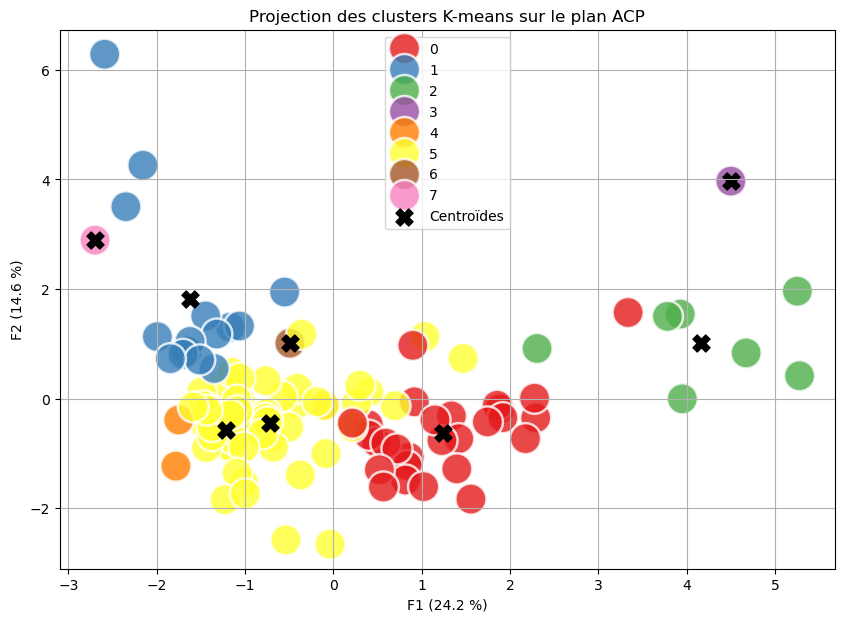

In [57]:
#Projection ACP + Clusters sur 2 composantes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=clusters,
    palette='Set1',
    s=500,
    alpha=0.8
)

# Calcul des centroïdes dans l'espace ACP
centers_pca = pca.transform(kmeans.cluster_centers_)

#  Ajout des centroïdes
plt.scatter(
    centers_pca[:, 0],
    centers_pca[:, 1],
    c='black',
    s=150,
    marker='X',
    label='Centroïdes'
)

# Mise en forme
plt.xlabel(f"F1 ({pca.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"F2 ({pca.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("Projection des clusters K-means sur le plan ACP")
plt.legend()
plt.grid(True)
plt.show()